# Zillow

## Import Packages

In [92]:
import pandas as pd  # data frame operations
import numpy as np #arrays and math functions
import statsmodels.api as sm #stat models (regression)
import matplotlib.pyplot as plt #2d plotting
from pandas.tools.plotting import scatter_matrix  # scatter plot matrix
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
from sklearn.tree import DecisionTreeRegressor  # machine learning tree
from sklearn.ensemble import RandomForestRegressor # ensemble method
from sklearn.preprocessing import Imputer
%config IPCompleter.greedy=True #tabbing for autocomplete
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
from pandas import Series
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from math import sqrt
from pandas import DataFrame
from scipy.stats import boxcox
import warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
!pip install cufflinks
import cufflinks as cf
import plotly 
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()
init_notebook_mode(connected=True)



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


### Read in Data

In [2]:
#Read CSV File in from the web
## files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv

url = 'http://files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv'
data = pd.read_csv(url) #pandas read csv function
print(str("You have read in a"),'' ,type(data))  #Printing object type

You have read in a  <class 'pandas.core.frame.DataFrame'>


### High Level Look at data

In [3]:
print(str("This dataframe currently have"), '', np.shape(data)[0], '', str("rows"), '', str("and"), 
      np.shape(data)[1], str("columns")) #printing dimensions of current dataframe

    #Change RegionID to Zipcode to avoid confusion
data.rename(columns={'RegionID' : 'Zipcode', 'RegionName' : 'Region',
                     'CountyName' : 'County'}, inplace=True)

data.head(n=2) #calling first 2 rows



This dataframe currently have  15338  rows  and 268 columns


Zipcode  Region     City State    Metro County  SizeRank   1996-04  \
0    84654   60657  Chicago    IL  Chicago   Cook         1  420800.0   
1    84616   60614  Chicago    IL  Chicago   Cook         2  542400.0   

    1996-05   1996-06   ...     2017-03  2017-04  2017-05  2017-06  2017-07  \
0  423500.0  426200.0   ...     1087500  1080200  1073700  1064100  1052600   
1  546700.0  551700.0   ...     1526300  1527000  1524600  1516600  1512500   

   2017-08  2017-09  2017-10  2017-11  2017-12  
0  1047600  1047700  1047600  1048800  1051600  
1  1513700  1513600  1508100  1502300  1496300  

[2 rows x 268 columns]

### Create dataframe with no missing values



In [4]:
df_cleaned = data.dropna()
warnings.filterwarnings("ignore")
df_cleaned["Zipcode"] = df_cleaned["Zipcode"].astype('category')
df_cleaned["Region"] = df_cleaned["Region"].astype('category')
df_cleaned["City"] = df_cleaned["City"].astype('category')
df_cleaned["State"] = df_cleaned["State"].astype('category')
df_cleaned["Metro"] = df_cleaned["Metro"].astype('category')
df_cleaned["County"] = df_cleaned["County"].astype('category')
df_cleaned["SizeRank"] = df_cleaned["SizeRank"].astype('category')

print(str("This dataframe currently has"), '', np.shape(df_cleaned)[0], '', str("rows"), '', str("and"), 
      np.shape(df_cleaned)[1], str("columns")) 
#printing dimensions of cleaned dataframe.


allminusmissing = (np.shape(data)[0])-(np.shape(df_cleaned)[0])
print(allminusmissing,'', 
          str("observations lost by removing all missing values - Circle back if this impacts accuracy. Note that null values decrease substantially post 2003."))

df_cleaned.describe() #print summary stats of all columns

    
    



This dataframe currently has  10638  rows  and 268 columns
4700  observations lost by removing all missing values - Circle back if this impacts accuracy. Note that null values decrease substantially post 2003.


1996-04       1996-05       1996-06       1996-07       1996-08  \
count  1.063800e+04  1.063800e+04  1.063800e+04  1.063800e+04  1.063800e+04   
mean   1.251639e+05  1.252531e+05  1.253337e+05  1.254029e+05  1.254891e+05   
std    7.921874e+04  7.906851e+04  7.900210e+04  7.896861e+04  7.896923e+04   
min    2.450000e+04  2.450000e+04  2.480000e+04  2.530000e+04  2.540000e+04   
25%    7.720000e+04  7.730000e+04  7.730000e+04  7.730000e+04  7.740000e+04   
50%    1.063000e+05  1.067000e+05  1.068500e+05  1.070000e+05  1.072500e+05   
75%    1.495000e+05  1.497000e+05  1.499000e+05  1.499000e+05  1.499000e+05   
max    1.769000e+06  1.768100e+06  1.766900e+06  1.764200e+06  1.762200e+06   

            1996-09       1996-10       1996-11       1996-12       1997-01  \
count  1.063800e+04  1.063800e+04  1.063800e+04  1.063800e+04  1.063800e+04   
mean   1.256099e+05  1.257817e+05  1.260264e+05  1.263751e+05  1.269054e+05   
std    7.900314e+04  7.906898e+04  7.917073e+04  7.941154e+04  7.984216e+04   
min    2.530000e+04  2.560000e+04  2.600000e+04  2.620000e+04  2.680000e+04   
25%    7.760000e+04  7.770000e+04  7.780000e+04  7.810000e+04  7.830000e+04   
50%    1.075000e+05  1.077000e+05  1.079500e+05  1.082000e+05  1.084000e+05   
75%    1.502000e+05  1.503000e+05  1.506000e+05  1.510000e+05  1.515750e+05   
max    1.762600e+06  1.763900e+06  1.763800e+06  1.764400e+06  1.765800e+06   

           ...            2017-03       2017-04       2017-05       2017-06  \
count      ...       1.063800e+04  1.063800e+04  1.063800e+04  1.063800e+04   
mean       ...       2.858859e+05  2.870511e+05  2.882186e+05  2.892460e+05   
std        ...       2.805536e+05  2.817050e+05  2.830268e+05  2.840960e+05   
min        ...       3.340000e+04  3.340000e+04  3.360000e+04  3.370000e+04   
25%        ...       1.377000e+05  1.385000e+05  1.392000e+05  1.394000e+05   
50%        ...       2.041000e+05  2.053000e+05  2.063000e+05  2.069500e+05   
75%        ...       3.301750e+05  3.318250e+05  3.328750e+05  3.344250e+05   
max        ...       5.654600e+06  5.716900e+06  5.777700e+06  5.810900e+06   

            2017-07       2017-08       2017-09       2017-10       2017-11  \
count  1.063800e+04  1.063800e+04  1.063800e+04  1.063800e+04  1.063800e+04   
mean   2.901185e+05  2.912461e+05  2.928014e+05  2.945772e+05  2.963288e+05   
std    2.849095e+05  2.861074e+05  2.875850e+05  2.905396e+05  2.947448e+05   
min    3.370000e+04  3.400000e+04  3.430000e+04  3.450000e+04  3.450000e+04   
25%    1.400000e+05  1.405250e+05  1.410000e+05  1.416250e+05  1.427000e+05   
50%    2.077000e+05  2.089000e+05  2.101000e+05  2.112500e+05  2.125000e+05   
75%    3.356750e+05  3.367750e+05  3.384750e+05  3.399750e+05  3.408500e+05   
max    5.786300e+06  5.756100e+06  5.745600e+06  5.852400e+06  6.028700e+06   

            2017-12  
count  1.063800e+04  
mean   2.977196e+05  
std    2.980834e+05  
min    3.450000e+04  
25%    1.433000e+05  
50%    2.132000e+05  
75%    3.428000e+05  
max    6.142100e+06  

[8 rows x 261 columns]

### Develop time series plots for the following Arkansas metro areas:
Hot Springs, Little Rock, Fayetteville, Searcy. Present all values from 1997 to 2013. Average at the metro-area level.

In [5]:
# We can clean data to reduce size/shape 

#Only looking at 4 cities
filter_list = ['Hot Springs', 'Little Rock', 'Fayetteville', 'Searcy']
#df_cleaned[df_cleaned.City.isin(filter_list)]  
                                                    #http://www.ritchieng.com/pandas-multi-criteria-filtering/
df_ark = pd.DataFrame(df_cleaned[df_cleaned.City.isin(filter_list)])
df_ark1 = df_ark.loc[:, 'Metro']


#need to shave columns < 1997
#df_ark.columns.get_loc('1997-01') #find index of 1997
df_ark2 =  df_ark.loc[:, '1997-01' : '2013-12'] #use .loc to index labels 
                                                    #https://stackoverflow.com/questions/10665889/how-to-take-column-slices-of-dataframe-in-pandas

#Merge two sets of columns together on index/zip
#pd.concat([df_ark1, df_ark2], axis=1, join='outer')
df_ark = pd.concat([df_ark1, df_ark2], axis=1, join='outer') #https://pandas.pydata.org/pandas-docs/stable/merging.html

np.shape(df_ark)# 26 observations w/ data from 1997 - Latest



#Grouping By + Mean
df_ark = df_ark.groupby(['Metro']).mean()
df_ark #There is a Fayetteville in Atlanta, Remove
df_ark = df_ark.drop('Atlanta', 0) #(0 for rows and 1 for columns.)

#separate dfs and out in 'tab
fay = pd.melt((df_ark.filter(like = 'Fayette', axis=0)))
hotspr = pd.melt((df_ark.filter(like = 'Hot', axis=0)))
littlerock = pd.melt((df_ark.filter(like = 'Little Rock', axis=0)))
searcy = pd.melt((df_ark.filter(like = 'Searcy', axis=0)))

fay['variable'] = pd.to_datetime(fay['variable'])
hotspr['variable'] = pd.to_datetime(hotspr['variable'])
littlerock['variable'] = pd.to_datetime(littlerock['variable'])
searcy['variable'] = pd.to_datetime(searcy['variable'])

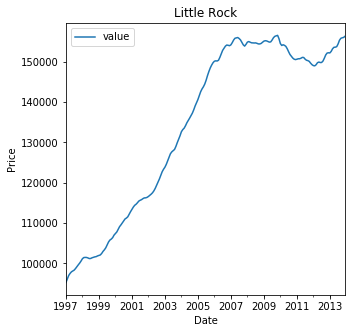

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5

#Fayetteville
fay.plot(x = 'variable')
plt.title('Fayetteville')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

#Hot Springs
hotspr.plot(x = 'variable')
plt.title('Hot Springs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

#Little Rock
littlerock.plot(x = 'variable')
plt.title('Little Rock')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

#Searcy
searcy.plot(x = 'variable')
plt.title('Searcy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()



### Autocorrelation / Partial Autocorrelation (Using Median)

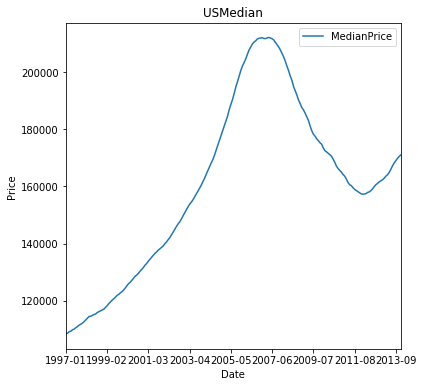

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from pylab import rcParams
rcParams['figure.figsize'] = 6,6


#Create melted dataframe taking median house price per t
df = df_cleaned.loc[:, '1997-01' : '2013-12'] 

dfmedian = pd.DataFrame(df.median(), columns= ['MedianPrice'])
dfmedian['MedianPrice'] = round(dfmedian['MedianPrice'], 2)

plt.hist(dfmedian.MedianPrice, bins = 10)
plt.title('Histogram of Median HH Price')
plt.xlabel('Price')
plt.ylabel('Frequency')


#Plot US Median House price per t
dfmedian.plot(y = 'MedianPrice')
plt.title('USMedian')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


dfmedian.MedianPrice.plot(kind = 'kde')
plt.title('Density Plot of Median Home Prices')
plt.show()
dfmediantest = df_cleaned.loc[:, '2014-01' : '2014-12']
dfmediantest = pd.DataFrame(dfmediantest.median(), columns= ['MedianPrice'])
dfmediantest['MedianPrice'] = round(dfmediantest['MedianPrice'], 2)
dfmediantest = dfmediantest.astype('float32')






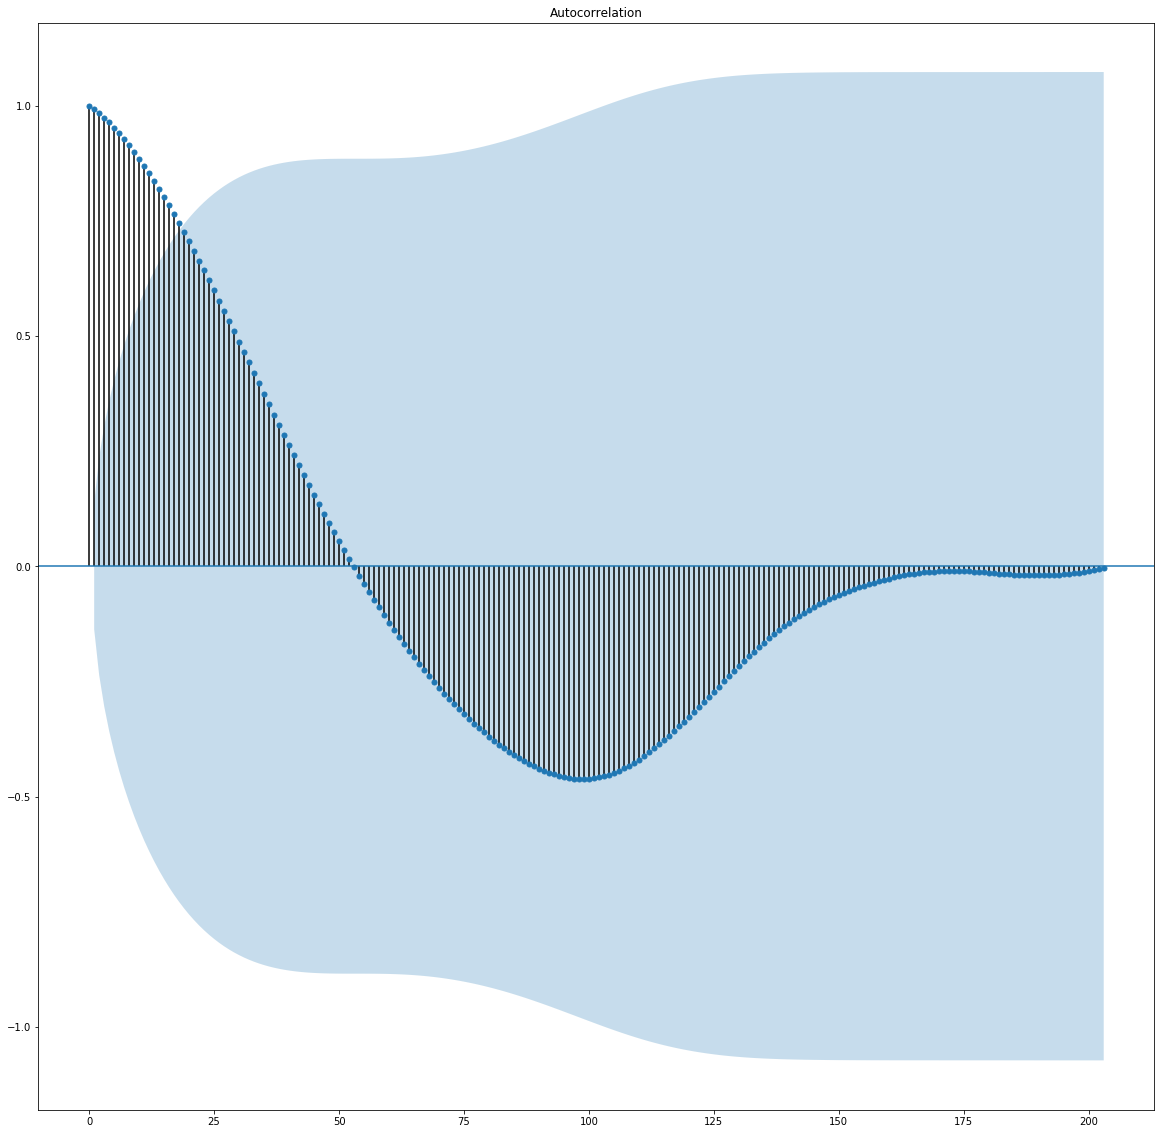

In [8]:
from matplotlib import pyplot
rcParams['figure.figsize'] = 10,10

#ACF and PACF to get P/Q for ARIMA model and show clusters 
plot_acf(dfmedian.MedianPrice, ax=pyplot.gca())
pyplot.show()

pyplot.subplot(212)

plot_pacf(dfmedian.MedianPrice, ax=pyplot.gca())
pyplot.show()





### Augmented Dickey Fuller Test (Using median)

ADF Statistic: -2.459017
p-value: 0.125767
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576


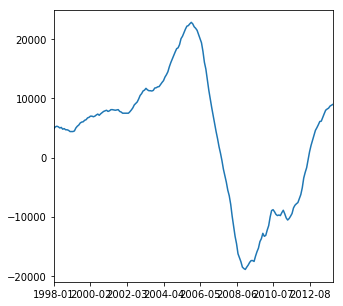

In [9]:
from statsmodels.tsa.stattools import adfuller
rcParams['figure.figsize'] = 5,5

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
X = dfmedian.MedianPrice
X = X.astype('float32')
# difference data
months_in_year = 12
stationary = difference(X, months_in_year)
stationary.index = dfmedian.index[months_in_year:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
# save
stationary.to_csv('stationary.csv')
# plot
stationary.plot()
pyplot.show()

### Develop ARIMA Model. (Using Median HH Price as dependent var)

In [10]:
# Find Best Orders of Magnitude for ARIMA Model
import warnings
import numpy
 
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.50)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		# difference data
		months_in_year = 12
		diff = difference(history, months_in_year)
		model = ARIMA(diff, order=arima_order)
		model_fit = model.fit(trend='nc', disp=0)
		yhat = model_fit.forecast()[0]
		yhat = inverse_difference(history, yhat, months_in_year)
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	mse = mean_squared_error(test, predictions)
	rmse = sqrt(mse)
	return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s RMSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# load dataset
series = df
# evaluate parameters
p_values = range(0, 7)
d_values = range(0, 3)
q_values = range(0, 7)
warnings.filterwarnings("ignore")
evaluate_models(dfmedian.MedianPrice, p_values, d_values, q_values)




ARIMA(0, 1, 1) RMSE=613.689
ARIMA(0, 1, 2) RMSE=550.229
ARIMA(0, 1, 3) RMSE=481.406
ARIMA(0, 1, 6) RMSE=446.062
ARIMA(0, 2, 1) RMSE=418.071
ARIMA(0, 2, 2) RMSE=421.484
ARIMA(0, 2, 3) RMSE=424.801
ARIMA(0, 2, 4) RMSE=421.630
ARIMA(0, 2, 5) RMSE=425.519
ARIMA(1, 1, 0) RMSE=414.813
ARIMA(1, 1, 4) RMSE=418.963
ARIMA(1, 1, 5) RMSE=421.974
ARIMA(1, 1, 6) RMSE=433.609
ARIMA(1, 2, 0) RMSE=420.045
ARIMA(1, 2, 1) RMSE=418.463
ARIMA(2, 1, 0) RMSE=415.276
ARIMA(2, 2, 0) RMSE=420.417
ARIMA(3, 2, 0) RMSE=424.107
ARIMA(3, 2, 1) RMSE=423.149
ARIMA(4, 2, 0) RMSE=424.884
ARIMA(4, 2, 1) RMSE=422.987
ARIMA(5, 1, 0) RMSE=421.624
ARIMA(5, 2, 0) RMSE=426.506
ARIMA(5, 2, 1) RMSE=424.070
ARIMA(5, 2, 2) RMSE=415.215
ARIMA(6, 1, 0) RMSE=424.042
ARIMA(6, 1, 1) RMSE=422.772
ARIMA(6, 2, 0) RMSE=424.590
Best ARIMA(1, 1, 0) RMSE=414.813


In [11]:
#evaluate manually configured ARIMA model with Best ARIMA fit

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]


# prepare data
X = dfmedian.MedianPrice
X = X.astype('float32')
train_size = int(len(X) * 0.80)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(5,2,2))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
    
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=169348.906, Expected=168450
>Predicted=167536.555, Expected=167100
>Predicted=166153.890, Expected=166250
>Predicted=165380.285, Expected=165600
>Predicted=165092.054, Expected=165000
>Predicted=163708.802, Expected=164200
>Predicted=163400.108, Expected=163600
>Predicted=163188.350, Expected=162600
>Predicted=161610.161, Expected=161400
>Predicted=160406.613, Expected=160600
>Predicted=159731.783, Expected=160300
>Predicted=159512.069, Expected=159600
>Predicted=159119.271, Expected=159000
>Predicted=158060.829, Expected=158600
>Predicted=158142.862, Expected=158200
>Predicted=157647.272, Expected=157800
>Predicted=157475.728, Expected=157400
>Predicted=157019.921, Expected=157300
>Predicted=157521.260, Expected=157350
>Predicted=157158.249, Expected=157500
>Predicted=157281.242, Expected=157950
>Predicted=158310.535, Expected=158100
>Predicted=158675.091, Expected=158600
>Predicted=158774.479, Expected=159200
>Predicted=159712.501, Expected=160000
>Predicted=160973.237, Ex

                0
count   41.000000
mean    -5.884525
std    352.619424
min   -898.905717
25%   -206.304336
50%     12.436856
75%    219.715159
max    668.758458


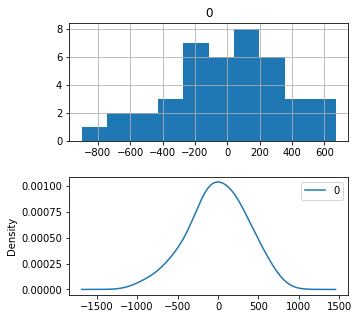

In [12]:
#summarize ARIMA forecast residuals
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]



# prepare data
X = dfmedian.MedianPrice
X = X.astype('float32')
train_size = int(len(X) * 0.80)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(5, 2, 2))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
    
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)

print(residuals.describe())
# plot
plt.figure()
plt.subplot(211)
residuals.hist(ax=plt.gca())
plt.subplot(212)
residuals.plot(kind='kde', ax=plt.gca())
plt.show()

In [26]:
#Save finalized model

# monkey patch around bug in ARIMA class
def __getnewargs__(self):
    return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))

ARIMA.__getnewargs__ = __getnewargs__

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

# prepare data
X = dfmedian.MedianPrice
X = X.astype('float32')

# difference data
months_in_year = 12
diff = difference(X, months_in_year)

# fit model
model = ARIMA(diff, order=(5,2,2)) # Using the best RMSE
model_fit = model.fit(trend='nc', disp=0)

# bias constant, could be calculated from in-sample mean residual
bias = 74.2230 # Using the residual model mean as our bias

# save model
model_fit.save('model.pkl')
np.save('model_bias.npy', [bias])

>Predicted=171607.271, Expected=171800
>Predicted=172829.884, Expected=172300
>Predicted=173178.683, Expected=172900
>Predicted=173508.167, Expected=173550
>Predicted=174441.667, Expected=173900
>Predicted=174731.049, Expected=174550
>Predicted=175532.727, Expected=175050
>Predicted=175565.889, Expected=175500
>Predicted=175871.634, Expected=176400
>Predicted=177170.930, Expected=176700
>Predicted=177035.143, Expected=177400
>Predicted=178012.340, Expected=177800
RMSE: 369.689


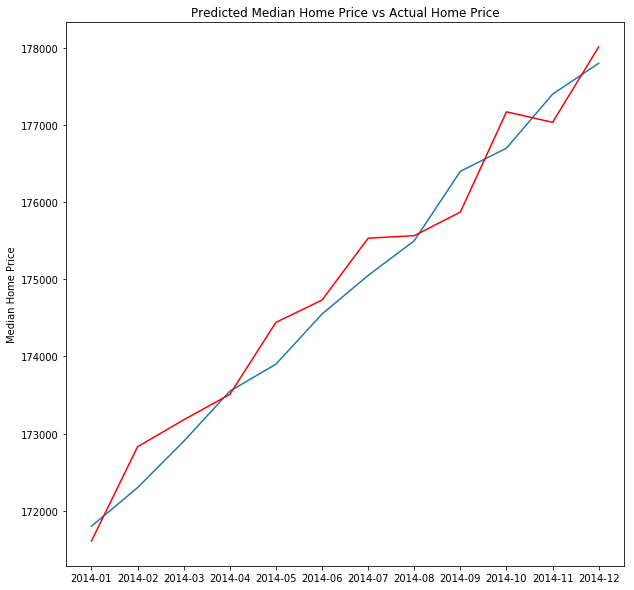

In [70]:
#Validating Forecasts against averaged testing data

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load and prepare datasets
X = dfmedian.MedianPrice.astype('float32')
history = [x for x in X]
months_in_year = 12
y = dfmediantest.MedianPrice.astype('float32')

# load model
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')

# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(history, yhat, months_in_year)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%3.f' % (yhat, y[0]))

# rolling forecasts
for i in range(1, len(y)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(5,2,2)) # Using the mest ARIMA
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = bias + inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = y[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

pred_dates = ['2014-01','2014-02', '2014-03']
# Send the prediction to csv file    
#predictions.to_csv('predictions.csv')

# report performance
rcParams['figure.figsize'] = 10,10
rmse = sqrt(mean_squared_error(y, predictions))
print('RMSE: %.3f' % rmse)
plt.plot(y)
plt.plot(predictions, color='red')
plt.title('Predicted Median Home Price vs Actual Home Price')
plt.ylabel('Median Home Price')
plt.show()

### Consolidate monthly data into an annual average (By State/Zip).

In [71]:
import datetime
rcParams['figure.figsize'] = 6,6

dftest = df_cleaned
dftest.head()

dfstatemedian = round(dftest.groupby(['State', 'Zipcode']).median() ,2)
dfstatemedian = dfstatemedian.reset_index(level = 'State')
dfstatemedian = dfstatemedian.reset_index(level = 'Zipcode')
dfstatemedian = dfstatemedian.dropna(how='any')

#Melted DF for plotting/vis. Grouped by state by average HH price
dfstatemedian1 = pd.melt(dfstatemedian, id_vars=['State', 'Zipcode'])
dfstatemedian1.rename(columns = {'variable' : 'Date', 'value': 'Price'}, inplace=True)

dfstatemedian1.head()

State  Zipcode     Date     Price
0    AK   100478  1996-04  238900.0
1    AL    73257  1996-04   84800.0
2    AL    73258  1996-04   62200.0
3    AL    73260  1996-04  107400.0
4    AL    73270  1996-04   90000.0

## Layer in Secondary data sources

In [73]:
#df 
dfstatemedian1.head(10)

#Tax data from IRS
tax = pd.read_csv('Tax2016.csv')
CensusEst = pd.read_csv('Census2015.csv') #https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=BP_2015_00CZ1&prodType=table
external = pd.merge(tax, CensusEst, on= 'Zipcode', how= 'inner')
external.head()

dfstatemedian2 = pd.merge(dfstatemedian1, external, on= 'Zipcode', how= 'inner')

dfstatemedian2 = dfstatemedian2.groupby(['Zipcode', 'Date', 'State']).mean()
dfstatemedian2 = dfstatemedian2.reset_index()
dfstatemedian2

#Break out datetime into month/year
dfstatemedian2['Date'] = pd.to_datetime(dfstatemedian2['Date'])
dfstatemedian2['Date'] = pd.to_datetime(dfstatemedian2['Date'])
dfstatemedian2['year'], dfstatemedian2['month'] = dfstatemedian2['Date'].dt.year, dfstatemedian2['Date'].dt.month

##### Create Training Dataset

In [113]:
train = dfstatemedian2
train = train.groupby(['year', 'Zipcode', 'State']).mean()
train = train.reset_index()
train
train["Zipcode"] = train["Zipcode"].astype('category')
train["State"] = train["State"].astype('category')
train.head()
train.drop('month', 1, inplace= True)


rcParams['figure.figsize'] = 12,12


#### Create Test dataframe. Use the average of 2014–2001, 2014–2002, and 2014–2003

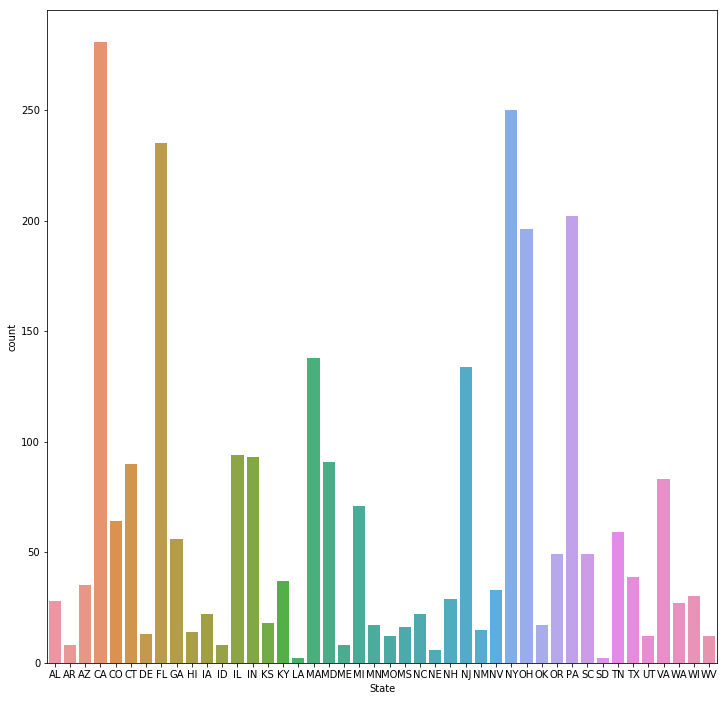

In [107]:
test = dfstatemedian2

#store each date range into a separate df
test1 =test[(test['Date'] > '2000-12-01') & (test['Date'] < '2015-1-01')]
test2 =  test[(test['Date'] > '2001-12-01') & (test['Date'] < '2015-1-01')]
test3 = test[(test['Date'] > '2002-12-01') & (test['Date'] < '2015-1-01')]

#use concat function to 'merge' these dfs together
df_concat = pd.concat((test1,test2,test3))



df_concat["year"] = 2014 #change year to 2014, because it's our '2014' test set
df_concat.drop('month', 1, inplace= True) #drop month because it is unnecssary in our analysis (Could potentially add back in)
df_concat = df_concat.groupby(['year', 'Zipcode', 'State']).mean() #Group by to compress 
df_concat = df_concat.reset_index() #reset index
df_concat["year"] = df_concat["year"].astype('category') #factorize
df_concat["State"] = df_concat["State"].astype('category')#factorize

df_concat.head() #call head

#Histogram/Countplot of State Counts, per test data set. This is indvidual observations related to each state
sns.countplot(df_concat.State)
plt.show()



In [76]:
#Correlation matrix https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling
g = sns.heatmap(train[["Price","CountTaxReturns2016","CountDependents2016","TotalIncome2016","CapGains2016", "TaxesPaid2016", "CountEstablishments", "EmployeesPaid", "Q1Payroll", "AnnPayroll"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()


#I thought this was a little cleaner correlation map than from the book.

## Build/Test Model

In [77]:
#train['logprice'] = np.log(train['Price'])

#did a stepwise regression here
#my_model1 = str('Price ~ State + year + Zipcode  + CapGains2016')
my_model1 = str('Price ~ State + year + Zipcode  + CountTaxReturns2016 + CountDependents2016 + TotalIncome2016+ CapGains2016')

#Adjusted R2 same for both models. 
#RMSE on test set the same for both models. 

train_model_fit1 = smf.ols(my_model1, data = train).fit()
model_summary =(train_model_fit1.summary())
model_params =(train_model_fit1.params)
train['predict_price'] = train_model_fit1.fittedvalues

#Store model weights in a csv
modelparams = pd.DataFrame(train_model_fit1.params)
modelparams.to_csv('Model.csv')


In [78]:
#Run on testset/predict + calculate RMSE

train_model_fit1.predict(df_concat) 
df_concat['predictedprice2014'] = train_model_fit1.predict(df_concat) 

df_concat['error2014'] = (df_concat['Price']- df_concat['predictedprice2014'])

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(df_concat['Price'], df_concat['predictedprice2014']))
rms



38172.75482853015

## Recommendation for SREIT

In [79]:
#Estimating house prices per 2020 and determining net difference between 2014 price and 2020 forecasted price

df_concat_2020 = df_concat
df_concat_2020["year"] = 2020
df_concat_2020['predictedprice2020'] = train_model_fit1.predict(df_concat_2020) 
df_concat_2020['IncreaseInPrice'] = (df_concat_2020['predictedprice2020']- df_concat_2020['Price'])
df_concat_2020['%IncreaseInPrice'] = (df_concat_2020['predictedprice2020']/ df_concat_2020['Price']) * 100

winners = df_concat_2020.sort_values(by=[ 'IncreaseInPrice'],ascending=False).head(3)
winners.loc[:, ['Zipcode', 'State', 'Price', 'predictedprice2020', 'IncreaseInPrice', '%IncreaseInPrice']]

Zipcode State          Price  predictedprice2020  IncreaseInPrice  \
1550    76270    KY  134132.905983       234131.642574     99998.736591   
1958    81601    WI  193997.649573       292736.187752     98738.538180   
1981    83401    SD  203696.581197       302258.663053     98562.081857   

      %IncreaseInPrice  
1550        174.551980  
1958        150.896770  
1981        148.386714

In [80]:
#Create dataframe to render map
train.head()

df123 = train.groupby(['State']).mean()
df123 = pd.DataFrame(df123.iloc[:, :2])
df123.drop('year', 1, inplace= True)
df123.head()
df123 = df123.reset_index()
df123 = df123.rename(columns={'State':'state'})

df123.head()
df123['state'] = df123['state'].apply(str)
df123.head()
df123.dtypes
df123['state'] = df123['state'].astype('str')
df123.dtypes



state     object
Price    float64
dtype: object

### Visual Depection of Median home price (1997-2013)

In [101]:
# Code was borrowed from the below link, and supplied w/ the help of Amara Moosa
#https://www.kaggle.com/abigaillarion/police-fatalities-in-united-states


# Create a subset data frame of the dataset
data = df123[['state', 'Price']]

# Median home price per 100,000 people in state
median_price = np.round(df123.Price, 2)

# Create a collor scale for the visualization
color_scale = [[0, 'rgb(229, 239, 245)'], [1, 'rgb(1, 97, 156)']]

# Define the dataset
data = [dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = color_scale,
        showscale = False,
        locations = df123.state,
        locationmode = 'USA-states',
        z = median_price,
        marker = dict(
            line = dict(
                color = 'rgb(255, 255, 255)',
                width = 2)
            ),
        )]

# Define the layout of the map
layout = dict(
         title = 'Median home price (1997-2013)',
         geo = dict(
             scope = 'usa',
             projection = dict(type = 'albers usa'),
             countrycolor = 'rgb(255, 255, 255)',
             showlakes = True,
             lakecolor = 'rgb(255, 255, 255)')
         )

# Display the final map
figure = dict(data = data, layout = layout)
init_notebook_mode(connected= True)


iplot(figure)


#See separate notebook for rendering**


# What if we wanted to look at just California?

In [ ]:
train.cali = train[train.State == "CA"] 
test.cali = df_concat[df_concat.State == "CA"]

#did a stepwise regression here
my_model2 = str('Price ~ State + year + Zipcode  + CountTaxReturns2016 + CountDependents2016 + TotalIncome2016+ CapGains2016')

#Adjusted R2 same for both models. 
#RMSE on test set the same for both models. 

train_model_fit2 = smf.ols(my_model2, data = train.cali).fit()
model_summary =(train_model_fit1.summary())
model_params =(train_model_fit1.params)
train.cali['predict_price'] = train_model_fit2.fittedvalues

rms = sqrt(mean_squared_error(train.cali['Price'], train.cali['predict_price']))
print (str("RMSE ="), " ", rms)


In [152]:
test.cali['predictedprice2014'] = train_model_fit2.predict(test.cali) 

test.cali['error2014'] = (test.cali['Price']- test.cali['predictedprice2014'])

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test.cali['Price'], test.cali['predictedprice2014']))
rms

test.cali.head()
rms
print (str("RMSE ="), " ", rms)

RMSE =   90348.9483342173


## Trying Ridge Regression

In [150]:

trainridgex = train.loc[:, ['CountTaxReturns2016', 'CountDependents2016', 'TotalIncome2016']]
trainridgey = train.loc[:, ['Price']]
trainridgex

from sklearn import linear_model
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)

clf.fit(trainridgex, trainridgey) #Fit model
clf.score(trainridgex, trainridgey) #Find R2
clf.coef_ #Get paramater coefficients

array([[ 1.33160858, -2.70542453, -0.00582847]])